In [1]:
"""
ML lab No3, Bestushev Konstantin C42323.
Tree classfiers and quality metrics.
"""

"\nML lab No1\nHomework on Machine Learning Technologies.\nImplementing of stochastic gradient descent\nand Adam's optimization algorithms using numpy library.\n"

Task:
1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
 small decision tree;
 deep decision tree;
 random forest on small trees;
 random forest on deep trees.

2. Calculate the following metrics to check the quality of your models:
 precision;
 recall;
 accuracy;
 F1-score;
 log-loss.
 
3. Plot precision-recall and ROC curves for your models.

4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

%matplotlib inline

In [2]:
dir = "D:/Work/Data_files/working_dir/"
file = "bioresponse.csv"

df = pd.read_csv(dir + file)
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# create train/test splitted samples of required shape:

y = df['Activity']
X = df.drop('Activity', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

In [4]:
# 1.1 short decision tree classifier

max_depth = 5

short_tree = DecisionTreeClassifier(max_depth = max_depth)
short_tree.fit(X_train, y_train)
short_tree_prediction = short_tree.predict(X_test)
short_tree_probas = short_tree.predict_proba(X_test)[:,1]

In [5]:
# 1.2 deep decision tree classifier

deep_tree = DecisionTreeClassifier(max_depth = None)
deep_tree.fit(X_train, y_train)
deep_tree_prediction = deep_tree.predict(X_test)
deep_tree_probas = deep_tree.predict_proba(X_test)[:,1]

In [6]:
# 1.3 short trees forest classifier

short_forest_clf = RandomForestClassifier(max_depth = max_depth,
                                          n_jobs = -1)
short_forest_clf.fit(X_train, y_train)
short_forest_prediction = short_forest_clf.predict(X_test)
short_forest_probas = short_forest_clf.predict_proba(X_test)[:,1]

In [7]:
# 1.4 deep trees forest classifier

deep_forest_clf = RandomForestClassifier(max_depth = None, n_jobs = -1)
deep_forest_clf.fit(X_train, y_train)
deep_forest_prediction = deep_forest_clf.predict(X_test)
deep_forest_probas = deep_forest_clf.predict_proba(X_test)[:,1]

In [8]:
# 2. Metrics calculaction:

# evaluate metric for classifier by their names
def count_metric(metric, classifier):
    if((metric in ['precision_recall_curve', 'roc_curve', 'log_loss'])):
        prediction_name = classifier + '_' + 'probas'
    else:
        prediction_name = classifier + '_' + 'prediction'
    str_to_execute = metric + '(y_test, ' + prediction_name + ')'
    return eval(str_to_execute)

score_metrics = ['precision_score', 'recall_score', 'accuracy_score',
                 'f1_score', 'log_loss', 'precision_recall_curve', 'roc_curve']
classifiers = ['short_tree', 'deep_tree', 'short_forest', 'deep_forest']
counted_metrics = {}

for clf in classifiers:
    counted_metrics[clf] = []
    for metric in score_metrics:
        counted_metrics[clf].append(count_metric(metric, clf))

counted_metrics = pd.DataFrame(counted_metrics, index = score_metrics)
counted_metrics.head(5)

,short_tree,deep_tree,short_forest,deep_forest
precision_score,0.799599,0.763889,0.763314,0.842315
recall_score,0.773256,0.746124,0.75,0.817829
accuracy_score,0.768657,0.733475,0.734542,0.815565
f1_score,0.786207,0.754902,0.756598,0.829892
log_loss,1.09998,9.20553,0.553119,0.449294


Text(0.5, 1.0, 'ROC curve')

<Figure size 720x360 with 0 Axes>

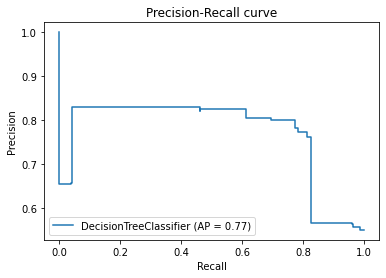

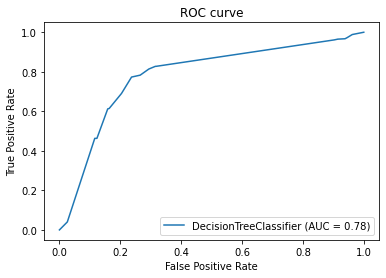

In [9]:
# 3 Precision-recall and ROC curves

# 3.1 for short tree
# precision-recall curve
plt.figure(figsize=(10, 5))
disp_PRC = plot_precision_recall_curve(short_tree, X_test, y_test)
disp_PRC.ax_.set_title('Precision-Recall curve')
# ROC curve
disp_ROC = plot_roc_curve(short_tree, X_test, y_test)
disp_ROC.ax_.set_title('ROC curve')
#plt.legend()

Text(0.5, 1.0, 'ROC curve')

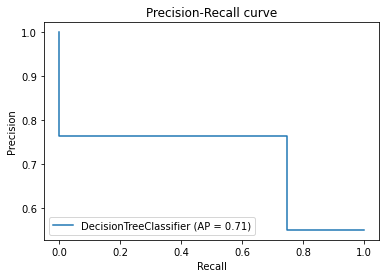

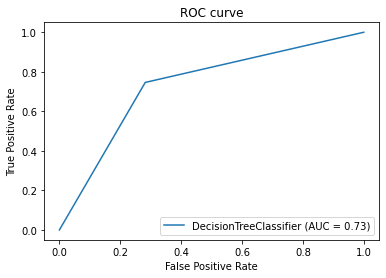

In [10]:
# 3.2 for deep tree
# precision-recall curve
disp_PRC = plot_precision_recall_curve(deep_tree, X_test, y_test)
disp_PRC.ax_.set_title('Precision-Recall curve')
# ROC curve
disp_ROC = plot_roc_curve(deep_tree, X_test, y_test)
disp_ROC.ax_.set_title('ROC curve')

Text(0.5, 1.0, 'ROC curve')

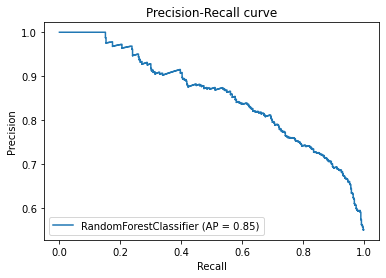

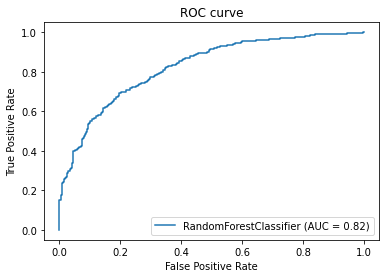

In [11]:
# 3.3 for forest on short trees
# precision-recall curve
disp_PRC = plot_precision_recall_curve(short_forest_clf, X_test, y_test)
disp_PRC.ax_.set_title('Precision-Recall curve')
# ROC curve
disp_ROC = plot_roc_curve(short_forest_clf, X_test, y_test)
disp_ROC.ax_.set_title('ROC curve')

Text(0.5, 1.0, 'ROC curve')

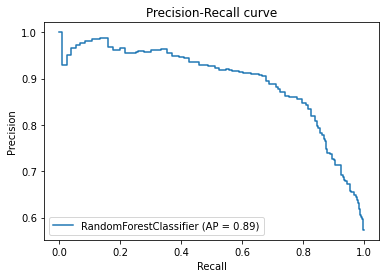

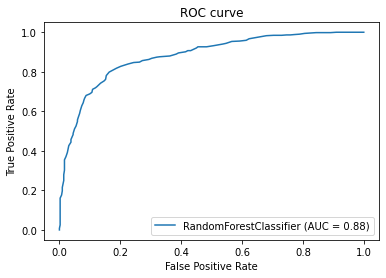

In [12]:
# 3.4 for forest on deep trees
# precision-recall curve
disp_PRC = plot_precision_recall_curve(deep_forest_clf, X_test, y_test)
disp_PRC.ax_.set_title('Precision-Recall curve')
# ROC curve
disp_ROC = plot_roc_curve(deep_forest_clf, X_test, y_test)
disp_ROC.ax_.set_title('ROC curve')

In [13]:
# 4.1 Train a classifier who avoids Type II errors

avoid_FN_clf = RandomForestClassifier(max_depth = None,
                                      n_jobs = -1, n_estimators = 500,
                                      class_weight = {0:0.9, 1:0.1})
avoid_FN_clf.fit(X_train, y_train)
avoid_FN_clf_probas = avoid_FN_clf.predict_proba(X_test)[:,1]
avoid_FN_clf_prediction = avoid_FN_clf.predict(X_test)

In [14]:
# Calculate metrics from p.2 for the classifier
# who avoids False Negative errors.

for metric in score_metrics[:-2]:
    print(metric, count_metric(metric, 'avoid_FN_clf'))

precision_score 0.7744227353463587
recall_score 0.8449612403100775
accuracy_score 0.779317697228145
f1_score 0.8081556997219648
log_loss 0.45481245695675987


Text(0.5, 1.0, 'ROC curve')

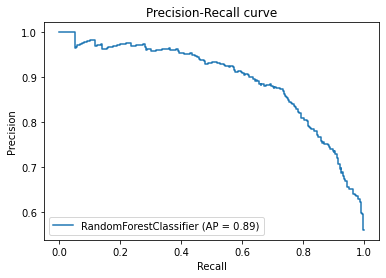

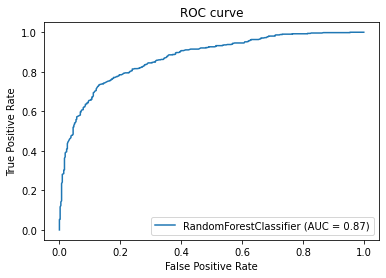

In [15]:
# precision-recall curve
disp_PRC = plot_precision_recall_curve(avoid_FN_clf, X_test, y_test)
disp_PRC.ax_.set_title('Precision-Recall curve')
# ROC curve
disp_ROC = plot_roc_curve(avoid_FN_clf, X_test, y_test)
disp_ROC.ax_.set_title('ROC curve')